Linear Regression and Boston Data Set

Load Boston Data Set from sklearn.datasets,
use
from sklearn.datasets import load_boston
boston = load_boston()

Load boston dataset has been removed from sklearn datasets due to racial bias... using an alternative California housing dataset provided



In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
from sklearn.model_selection import train_test_split

Assign data to X and target to y


In [3]:
X, y = housing.data, housing.target

Check the shape of the dataset


In [4]:
X.shape

(20640, 8)

Plot the scatter plot of each attribute versus MEDV
You can use the starter code below

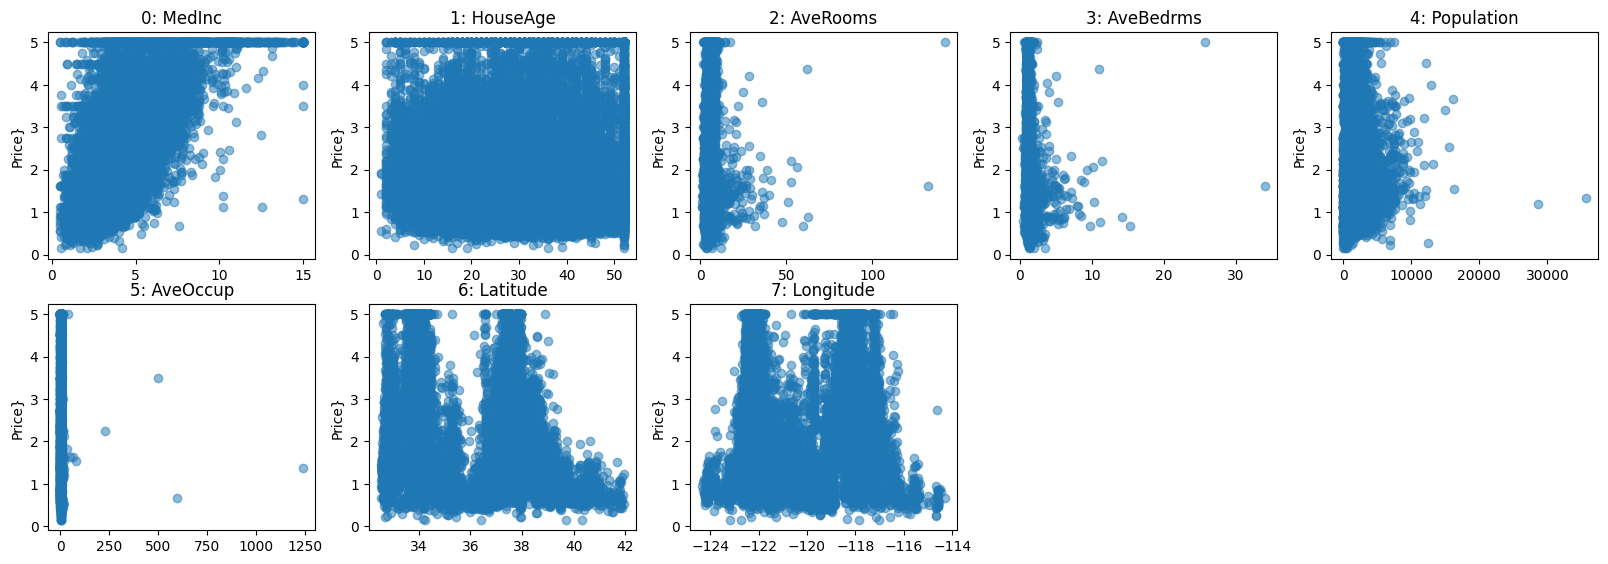

In [11]:
fig, axes = plt.subplots(3, 5, figsize=(20, 10))
for i, ax in enumerate(axes.ravel()):
    if i >= housing.data.shape[1]:
        ax.set_visible(False)
        continue
    ax.plot(X[:, i], y, 'o', alpha=.5)
    ax.set_title("{}: {}".format(i, housing.feature_names[i]))
    ax.set_ylabel("Price}")

In [12]:
print(X.shape)
print(y.shape)

(20640, 8)
(20640,)


Split the dataset into test and train datasets, you can set the random seed to 42 by random_state=42


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.impute import SimpleImputer
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

run cross validation for the train and test datasets for cv=10

print the mean score for the cross validation using linear regressor (LinearRegressor())

do the same two steps above for random forest regressor. For that you can import

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np

In [23]:
np.mean(cross_val_score(LinearRegression(), X_train, y_train, cv=10))

0.6062585589652913

In [28]:
np.mean(cross_val_score(RandomForestRegressor(), X_train, y_train, cv=10))

0.8039750119570164

Boston Housing Data with Polynomials

Transform the Boston House dataset and split the dataset into test and train datasets

Run cross-validation

Plot the coefficients of the model

Load boston dataset has been removed from sklearn datasets due to racial bias... using an alternative California housing dataset provided


In [30]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, scale
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
from sklearn.model_selection import train_test_split
X, y = housing.data, housing.target

In [32]:
X_poly = PolynomialFeatures(include_bias=False).fit_transform(SimpleImputer().
                                                              fit_transform(scale(X)))
print(X_poly.shape)
X_poly_train, X_poly_test, y_train, y_test = train_test_split(X_poly, y,
                                                              random_state=42)

(20640, 44)


In [33]:
from sklearn.preprocessing import PolynomialFeatures,StandardScaler, scale
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

trans=Pipeline([
            ("poly", PolynomialFeatures(include_bias=False)),
            ("imputer", SimpleImputer()),
            ("scale", StandardScaler())
        ])

X_poly_train = trans.fit_transform(X_train)
X_poly_test = trans.transform(X_test)
print(X_poly_train.shape)

(15480, 44)


In [34]:
np.mean(cross_val_score(LinearRegression(), X_poly_train, y_train, cv=10))

-75.81299874573398

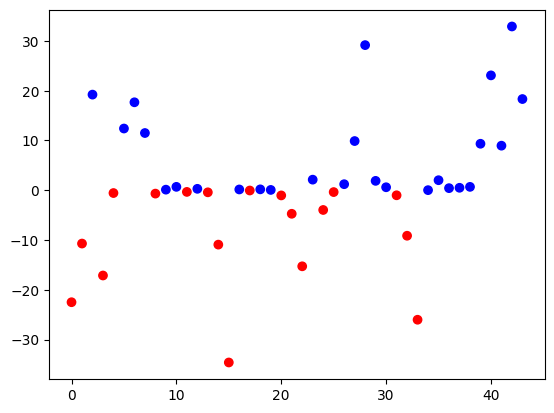

In [36]:
import os
os.makedirs('Fig',exist_ok=True)
lr = LinearRegression().fit(X_poly_train, y_train)
plt.scatter(range(X_poly.shape[1]), lr.coef_, c=np.sign(lr.coef_), cmap="bwr_r")
plt.savefig("Fig/lr_coefficients_large.png")